In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv('gbm-data.csv')
data_np = data.values

In [4]:
X = data_np[:,1:]
y = data_np[:,0]

In [5]:
print(data_np)

[[1.         0.         0.49700901 ... 0.         0.         0.        ]
 [1.         0.36666667 0.60629148 ... 0.         1.         0.        ]
 [1.         0.0333     0.48012427 ... 0.         0.         0.        ]
 ...
 [0.         0.2        0.52056377 ... 0.         0.         0.        ]
 [1.         0.1        0.7656462  ... 0.         0.         0.        ]
 [0.         0.13333333 0.53395198 ... 0.         0.         0.        ]]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001


3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001
3001 3001


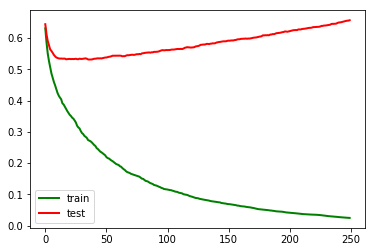

In [20]:
loss_test = []
loss_train = []
y_to_sigmoid = []
for i in [1, 0.5, 0.3, 0.2, 0.1]:
    clf = GradientBoostingClassifier(n_estimators=250, random_state=241, learning_rate = i)
    clf.fit(X_train, y_train)
        
    #staged_decision_function()
    for iteration, y_pred in enumerate(clf.staged_decision_function(X_train)):
        sigm_predict_train = 1 / (1 + np.exp(-y_pred))
        loss = log_loss(y_train, sigm_predict_train)
        loss_train.append(loss)
        
    for iteration1, y_pred1 in enumerate(clf.staged_decision_function(X_test)):
        sigm_predict_test = 1 / (1 + np.exp(-y_pred1))
        loss1 = log_loss(y_test, sigm_predict_test)
        loss_test.append(loss1)
        
    if(i == 0.2):
        plt.figure()
        plt.plot(loss_train, 'g', linewidth=2)
        plt.plot(loss_test, 'r', linewidth=2)
        plt.legend(['train', 'test'])
        print(min(loss_test), loss_test.index(min(loss_test)))

    loss_train.clear()
    loss_test.clear()

In [26]:
clf_1 = RandomForestClassifier(random_state=241, n_estimators=36)
clf_1.fit(X_train, y_train)
loss_test_forrest = []
result = clf_1.predict_proba(X_test)

loss2 = log_loss(y_test, result)
print(loss2)


0.5413812861804069
